# FEATURE ENGINEERING
 1. Train & Test Split 
 2. Handle missing values
 3. Feature Scaling
 4. Handle Outliers

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

df = pd.read_csv('Schrimp_dataset.csv')
X  = df.iloc[:,:-1]
y  = df.VirusDetected

### 1. Train & Test Split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
df_train = pd.concat([X_train, y_train], axis = 1)
df_test  = pd.concat([X_test, y_test], axis = 1)
df_train.shape, X_test.shape

((186, 41), (47, 40))

### 2. Handling missing values 
    - kNN Imputation
    - Random Forest Imputation
    - Iterative Regression Imputation

In [4]:
from sklearn.impute import KNNImputer
from missforest.miss_forest import MissForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# Imputation techniques
knn_imputer         = KNNImputer(n_neighbors = 3)
mforest_imputer     = MissForest()
iregression_imputer = IterativeImputer(estimator = LinearRegression(), 
                                   missing_values = np.nan, 
                                   max_iter = 5, 
                                   imputation_order = 'roman', 
                                   random_state = 0)
# Apply an Imputation technique for training & testing datasets and rename columns
df_train  = pd.DataFrame(iregression_imputer.fit_transform(df_train), columns = ['PriorLandUse', 'Area_ha', 'SoilType', 'CanalDepth_ft', 'GherDepth_ft',
       'Operator', 'FertilizerUse', 'ChemicalUsePondPreparation',
       'ChemicalUseWaterTreatment', 'Aerator', 'GherDryAfterHarvest',
       'SludgeRemovalMethods', 'SludgeRemovalInterval',
       'MaintainAndRepairDikes', 'PeriodOfFallow', 'WaterSource_DirectNatural',
       'WaterSource_IndirectNatural', 'WaterComingViaOtherFarms', 'Reservoir',
       'WaterExchangeFrequency', 'InletOutlet', 'CultureMethod',
       'SourceOfFingerling', 'StockingDensity_PL',
       'StockingAge_Days', 'PLQuality', 'CropRotation', 'FeedType',
       'FeedAdditives', 'BirdScare', 'CrabFench', 'FootBath', 'LimitedAccess',
       'SameEquipmentForWholeCultureArea', 'CulturePractice', 'Temperature',
       'pH', 'Salinity', 'PreviousPrevalence', 'CurrentPrevalance',
       'VirusDetected'])

df_test  = pd.DataFrame(iregression_imputer.fit_transform(df_test), columns = ['PriorLandUse', 'Area_ha', 'SoilType', 'CanalDepth_ft', 'GherDepth_ft',
       'Operator', 'FertilizerUse', 'ChemicalUsePondPreparation',
       'ChemicalUseWaterTreatment', 'Aerator', 'GherDryAfterHarvest',
       'SludgeRemovalMethods', 'SludgeRemovalInterval',
       'MaintainAndRepairDikes', 'PeriodOfFallow', 'WaterSource_DirectNatural',
       'WaterSource_IndirectNatural', 'WaterComingViaOtherFarms', 'Reservoir',
       'WaterExchangeFrequency', 'InletOutlet', 'CultureMethod',
       'SourceOfFingerling', 'StockingDensity_PL/40MeterSquare',
       'StockingAge_Days', 'PLQuality', 'CropRotation', 'FeedType',
       'FeedAdditives', 'BirdScare', 'CrabFench', 'FootBath', 'LimitedAccess',
       'SameEquipmentForWholeCultureArea', 'CulturePractice', 'Temperature',
       'pH', 'Salinity', 'PreviousPrevalence', 'CurrentPrevalance',
       'VirusDetected'])

# Update the training set
X_train  = df_train.iloc[:,:-1]
y_train  = df_train.VirusDetected

X_test  = df_test.iloc[:,:-1]
y_test  = df_test.VirusDetected

Iterative Regression Imputation is applied

### 3. Feature Scaling 
    - Standardization 
        - (X - Xmean)/std
    - MinMaxScaler 
        - (X - Xmin)/(Xmax - Xmin)
    - Robust Scaler
        - (X - Xmedian)/InterQuartileRange

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

std_scaler = StandardScaler()
mmx_scaler = MinMaxScaler()
rob_scaler = RobustScaler()

# Scale independent features from the Train & Test datasets independently to avoid Data Leakeage
X_train = pd.DataFrame(rob_scaler.fit_transform(X_train), columns = ['PriorLandUse', 'Area_ha', 'SoilType', 'CanalDepth_ft', 'GherDepth_ft',
       'Operator', 'FertilizerUse', 'ChemicalUsePondPreparation',
       'ChemicalUseWaterTreatment', 'Aerator', 'GherDryAfterHarvest',
       'SludgeRemovalMethods', 'SludgeRemovalInterval',
       'MaintainAndRepairDikes', 'PeriodOfFallow', 'WaterSource_DirectNatural',
       'WaterSource_IndirectNatural', 'WaterComingViaOtherFarms', 'Reservoir',
       'WaterExchangeFrequency', 'InletOutlet', 'CultureMethod',
       'SourceOfFingerling', 'StockingDensity_PL',
       'StockingAge_Days', 'PLQuality', 'CropRotation', 'FeedType',
       'FeedAdditives', 'BirdScare', 'CrabFench', 'FootBath', 'LimitedAccess',
       'SameEquipmentForWholeCultureArea', 'CulturePractice', 'Temperature',
       'pH', 'Salinity', 'PreviousPrevalence', 'CurrentPrevalance'])

X_test = pd.DataFrame(rob_scaler.transform(X_test), columns = ['PriorLandUse', 'Area_ha', 'SoilType', 'CanalDepth_ft', 'GherDepth_ft',
       'Operator', 'FertilizerUse', 'ChemicalUsePondPreparation',
       'ChemicalUseWaterTreatment', 'Aerator', 'GherDryAfterHarvest',
       'SludgeRemovalMethods', 'SludgeRemovalInterval',
       'MaintainAndRepairDikes', 'PeriodOfFallow', 'WaterSource_DirectNatural',
       'WaterSource_IndirectNatural', 'WaterComingViaOtherFarms', 'Reservoir',
       'WaterExchangeFrequency', 'InletOutlet', 'CultureMethod',
       'SourceOfFingerling', 'StockingDensity_PL',
       'StockingAge_Days', 'PLQuality', 'CropRotation', 'FeedType',
       'FeedAdditives', 'BirdScare', 'CrabFench', 'FootBath', 'LimitedAccess',
       'SameEquipmentForWholeCultureArea', 'CulturePractice', 'Temperature',
       'pH', 'Salinity', 'PreviousPrevalence', 'CurrentPrevalance'])

# Update scaled datasets
df_train = pd.concat([X_train, y_train], axis = 1)     
df_test  = pd.concat([X_test, y_test], axis = 1)  

Robust Scaling is applied

### 4. Handling outliers
    - One Class SVM
    - kNN outlier detector
    - Isolation Forest 

Text(0, 0.5, 'kNN Distances')

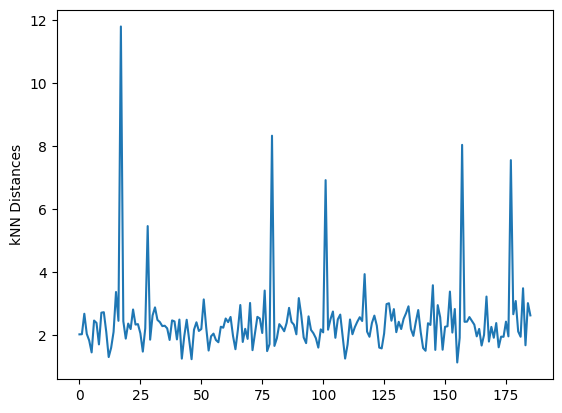

In [7]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest

# Specify outlier model detectors for the training dataset 
SVM_detector = OneClassSVM(kernel = 'rbf', gamma = 0.005, nu = 0.03).fit(df_train.values) 
kNN_detector = NearestNeighbors(n_neighbors = 3).fit(df_train.values)
IRF_detector = IsolationForest(contamination = .1).fit(df_train.values)

# Predict 
SVM_predictions    = SVM_detector.predict(df_train.values)
distances, indexes = kNN_detector.kneighbors(df_train.values)
IRF_predictions    = IRF_detector.predict(df_train.values)

# Plot distances in kNN
#plt.subplot(1, 2, 1)
plt.plot(distances.mean(axis =1))
plt.ylabel('kNN Distances')

kNN Outlier Detector is applied


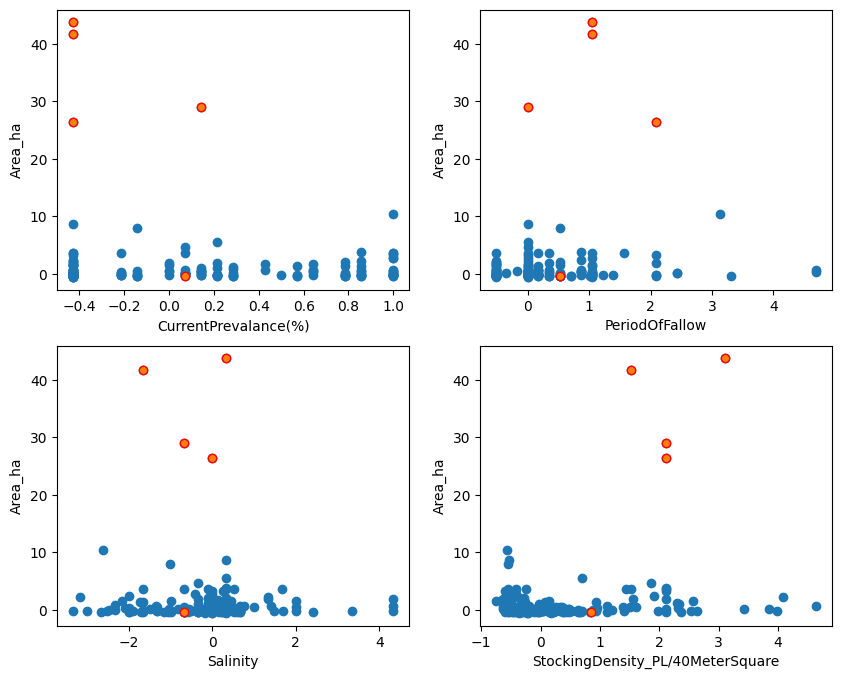

In [8]:
# Filter anomalies
SVM_outlier_values = df_train[(SVM_predictions < 0)]
kNN_outlier_values = df_train[distances.mean(axis = 1) > 6] # Set a threshold of 6 according to the distance plot 
IRF_outlier_values = df_train[(IRF_predictions < 0)]

# Plot Anomalies 
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,8))

ax[0,0].scatter(df_train['CurrentPrevalance'], df_train['Area_ha'])
ax[0,0].scatter(kNN_outlier_values['CurrentPrevalance'], kNN_outlier_values['Area_ha'], edgecolors = 'r')
ax[0,0].set(xlabel="CurrentPrevalance(%)",ylabel="Area_ha")

ax[0,1].scatter(df_train['PeriodOfFallow'], df_train['Area_ha'])
ax[0,1].scatter(kNN_outlier_values['PeriodOfFallow'], kNN_outlier_values['Area_ha'], edgecolors = 'r')
ax[0,1].set(xlabel="PeriodOfFallow",ylabel="Area_ha")

ax[1,0].scatter(df_train['Salinity'], df_train['Area_ha'])
ax[1,0].scatter(kNN_outlier_values['Salinity'], kNN_outlier_values['Area_ha'], edgecolors = 'r')
ax[1,0].set(xlabel="Salinity",ylabel="Area_ha")

ax[1,1].scatter(df_train['StockingDensity_PL'], df_train['Area_ha'])
ax[1,1].scatter(kNN_outlier_values['StockingDensity_PL'], kNN_outlier_values['Area_ha'], edgecolors = 'r')
ax[1,1].set(xlabel="StockingDensity_PL/40MeterSquare",ylabel="Area_ha")

print('kNN Outlier Detector is applied')
plt.show()

# FEATURE SELECTION
1. Lasso & Ridge Regressions
2. Random Forest & Extremely Randomized Trees

### 1. Lasso & Ridge Regressions

In [9]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

In [10]:
# a. Specify Lasso & Ridge models with a regularization parameter of 0.005
# b. Use SelectFromModel from sklearn to select features different from zero and Fit the selected model
lasso_model    = Lasso(alpha = 0.005, random_state = 0)
ridge_model    = Ridge(alpha = 0.005, random_state = 0)

lasso_selector = SelectFromModel(lasso_model).fit(X_train, y_train)
ridge_selector = SelectFromModel(ridge_model).fit(X_train, y_train)

In [15]:
# Get the selected features
lasso_features = X_train.columns[lasso_selector.get_support()]
ridge_features = X_train.columns[ridge_selector.get_support()]
    
print('Total features: {}'.format((X_train.shape[1])))
print('Selected features with Lasso: {}'.format(len(lasso_features)))
print('Selected features with Ridge: {}'.format(len(ridge_features)))

print('Lasso Features: {}'.format(lasso_features))
print('Ridge Features: {}'.format(ridge_features))

Total features: 40
Selected features with Lasso: 24
Selected features with Ridge: 12
Lasso Features: Index(['PriorLandUse', 'Area_ha', 'SoilType', 'CanalDepth_ft', 'GherDepth_ft',
       'FertilizerUse', 'ChemicalUsePondPreparation', 'Aerator',
       'SludgeRemovalMethods', 'SludgeRemovalInterval',
       'MaintainAndRepairDikes', 'PeriodOfFallow', 'Reservoir',
       'WaterExchangeFrequency', 'CultureMethod', 'SourceOfFingerling',
       'StockingDensity_PL', 'PLQuality', 'FeedType', 'FeedAdditives', 'pH',
       'Salinity', 'PreviousPrevalence', 'CurrentPrevalance'],
      dtype='object')
Ridge Features: Index(['ChemicalUsePondPreparation', 'Aerator', 'GherDryAfterHarvest',
       'WaterSource_DirectNatural', 'WaterSource_IndirectNatural',
       'WaterComingViaOtherFarms', 'Reservoir', 'CrabFench', 'FootBath',
       'LimitedAccess', 'CulturePractice', 'CurrentPrevalance'],
      dtype='object')


### 2. Random Forest & Extremely Randomized Trees

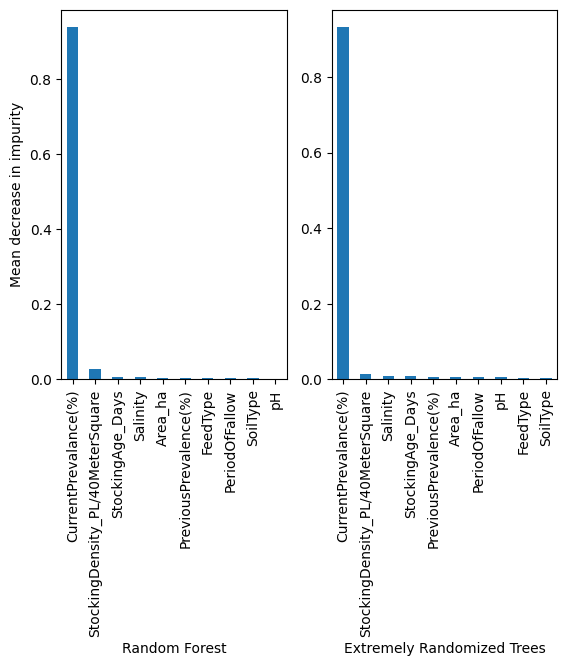

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

rf_model = RandomForestRegressor().fit(X_train, y_train)
xt_model = ExtraTreesRegressor().fit(X_train, y_train)

series_importance_rf   = pd.Series(rf_model.feature_importances_, index = X_train.columns)
series_importance_tree = pd.Series(xt_model.feature_importances_, index = X_train.columns)

plt.subplot(1,2,1)
series_importance_rf.nlargest(10).plot.bar()
plt.xlabel('Random Forest')
plt.ylabel('Mean decrease in impurity')

plt.subplot(1,2,2)
series_importance_tree.nlargest(10).plot.bar()
plt.xlabel('Extremely Randomized Trees')
plt.show()

- For this particular project, the top 10 selected features given by the Random Forest will be taken for building the ML models

In [16]:
# Drop unimportant features from training & testing datasets
df_train.drop(columns = ['PriorLandUse', 'CanalDepth_ft', 'GherDepth_ft',
       'Operator', 'FertilizerUse', 'ChemicalUsePondPreparation',
       'ChemicalUseWaterTreatment', 'Aerator', 'GherDryAfterHarvest',
       'SludgeRemovalMethods', 'SludgeRemovalInterval',
       'MaintainAndRepairDikes', 'WaterSource_DirectNatural',
       'WaterSource_IndirectNatural', 'WaterComingViaOtherFarms', 'Reservoir',
       'WaterExchangeFrequency', 'InletOutlet', 'CultureMethod',
       'SourceOfFingerling', 'PLQuality', 'CropRotation', 'FeedAdditives', 
       'BirdScare', 'CrabFench', 'FootBath', 'LimitedAccess',
       'SameEquipmentForWholeCultureArea', 'CulturePractice', 'Temperature'], axis = 1, inplace = True)

df_test.drop(columns = ['PriorLandUse', 'CanalDepth_ft', 'GherDepth_ft',
       'Operator', 'FertilizerUse', 'ChemicalUsePondPreparation',
       'ChemicalUseWaterTreatment', 'Aerator', 'GherDryAfterHarvest',
       'SludgeRemovalMethods', 'SludgeRemovalInterval',
       'MaintainAndRepairDikes', 'WaterSource_DirectNatural',
       'WaterSource_IndirectNatural', 'WaterComingViaOtherFarms', 'Reservoir',
       'WaterExchangeFrequency', 'InletOutlet', 'CultureMethod',
       'SourceOfFingerling', 'PLQuality', 'CropRotation', 'FeedAdditives', 
       'BirdScare', 'CrabFench', 'FootBath', 'LimitedAccess',
       'SameEquipmentForWholeCultureArea', 'CulturePractice', 'Temperature'], axis = 1, inplace = True)

# Update dataframes 
X_train  = df_train.iloc[:,:-1]
y_train  = df_train.VirusDetected

X_test   = df_test.iloc[:,:-1]
y_test   = df_test.VirusDetected

# Create final dataset files

In [18]:
df_train.to_csv('Final_Train_dataset.csv', index = False)
df_test.to_csv('Final_Test_dataset.csv', index = False)